## 자연어 처리를 통한 성격 예측 : WordCloud 시각화

In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import pickle
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
%matplotlib inline

### 1. mbti type별 wordcloud image 시각화

In [2]:
# 전처리된 데이터 가져와 df객체에 담아두기
df = pd.read_csv('mbti_new.csv', header = 'infer')
df.head()

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired another silly misconception approaching ...


In [3]:
# 모든 type을 출력해 확인해본다. 
df.type.unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [4]:
# groupby를 통해 type별 posts 내용을 모두 합쳐 df_type 객체에 저장한다.  
df_type = df.groupby('type').sum()

In [5]:
# 확인. mbti 유형의 개수(16개)만큼 행이 존재한다는 것을 알 수 있다. 
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, ENFJ to ISTP
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   16 non-null     object
dtypes: object(1)
memory usage: 256.0+ bytes


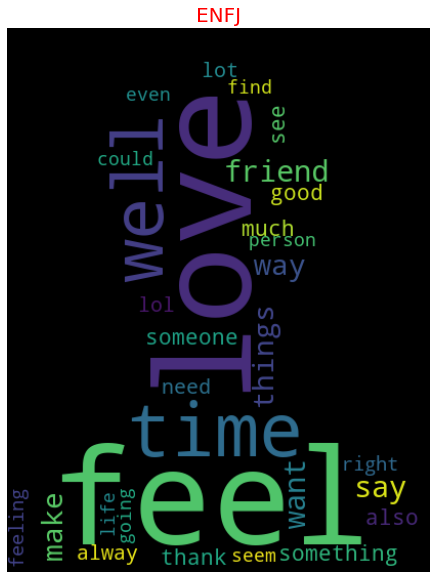

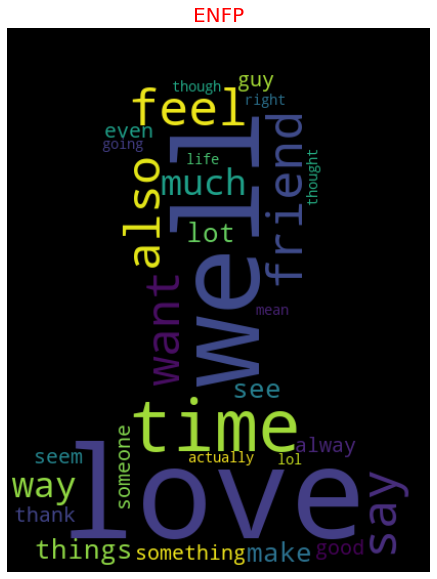

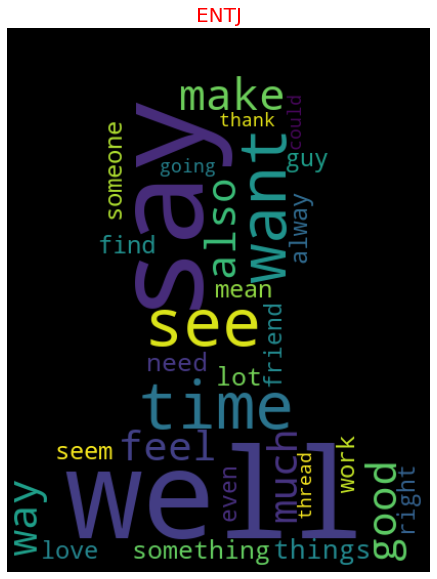

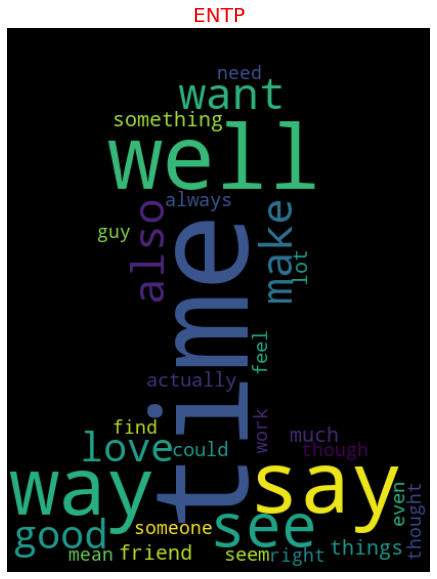

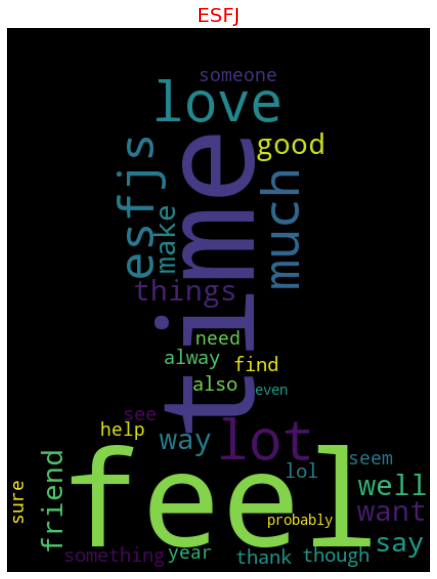

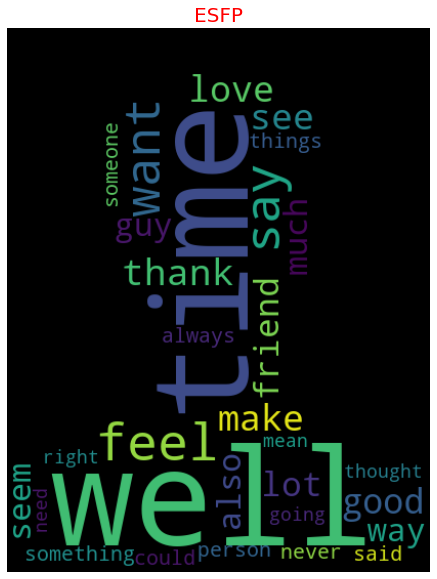

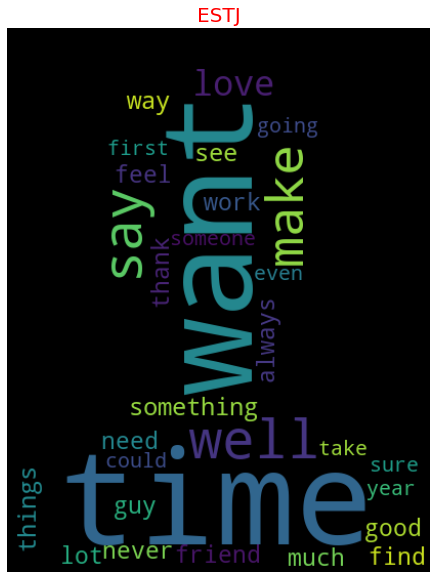

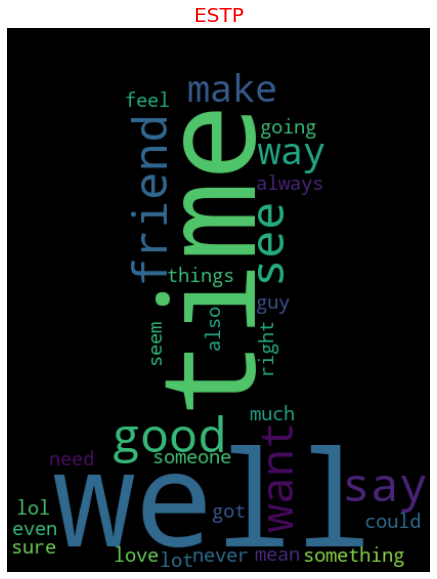

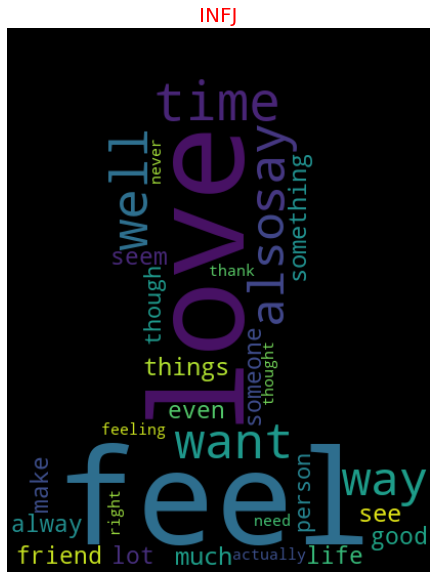

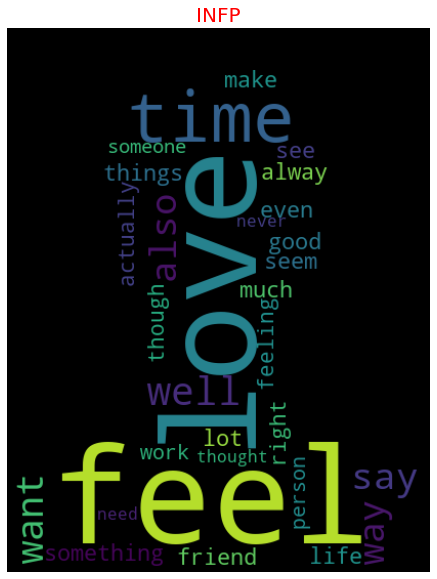

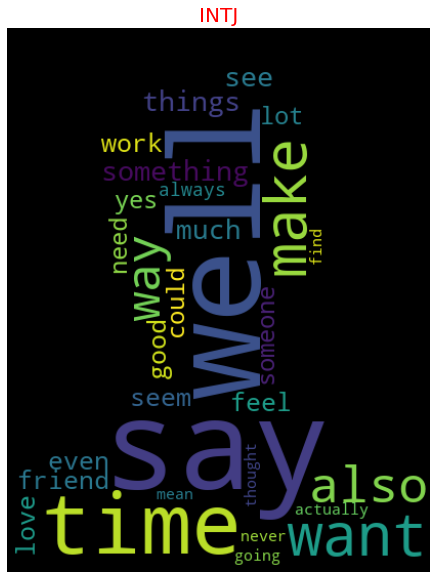

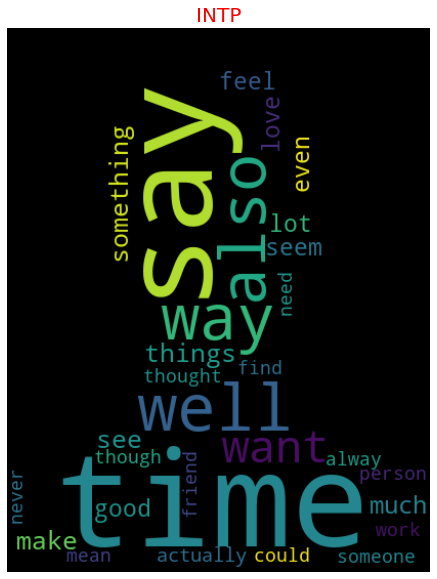

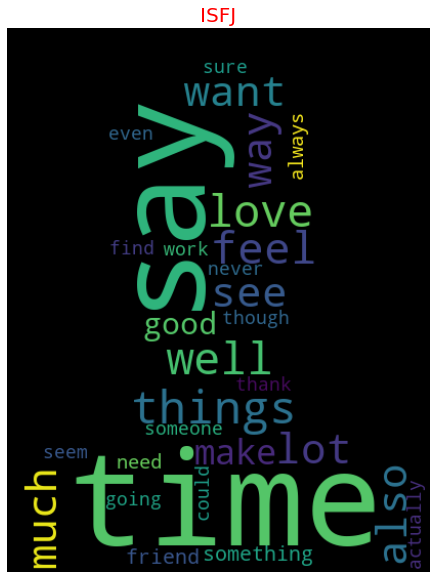

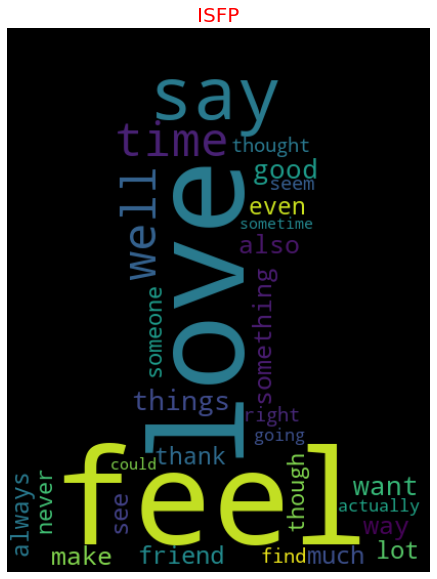

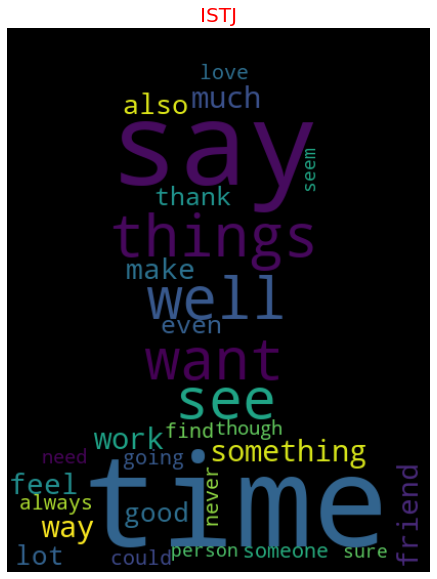

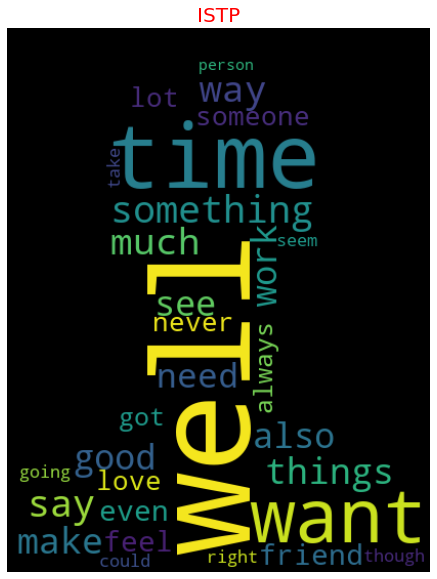

In [6]:
img = Image.open(r'.\Sun.jpg') # 배경 모양 커스터마이징
picture = np.array(img)
custom_words = [x.lower() for x in list(df.type.unique())]
custom_words.extend(['think', 'like', 'people', 'know', 'one', 'thing', 'would', 'really', 'get', 'type'])
cloud = WordCloud(background_color='black', max_words=30, mask = picture, 
    stopwords = custom_words) # 의미없이 자주 등장하는 단어들 제외

for i in range(16):
    sentence = df_type.posts.iloc[i]
    cloud.generate(sentence)
    
    plt.figure(figsize=(10,10))
    plt.title(df_type.index[i], fontdict=  {'fontsize': 20,
        'fontweight': 10,
        'color': "red"})
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")  
    plt.show()

### 2. 외향-내향형 성격별 wordcloud image 시각화

In [7]:
# 앞서 16개의 type으로 구분했던 df_type을 다시 2개의 유형(내향-외향)으로 구분한다. 
df_type = df_type.rename_axis('type').reset_index()
df_EI = df_type.copy()
df_EI['type'] = df_EI['type'].apply(lambda x : x[0])

In [8]:
# E(외향)과 I(내형)으로 groupby
df_EI = df_EI.groupby('type').sum()

In [9]:
# 확인
df_EI

,posts
type,
E,went break months ago together years planned l...
I,enfp intj moments sportscenter top ten plays p...


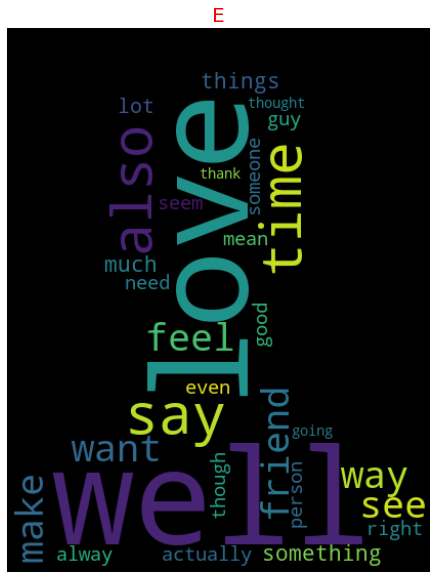

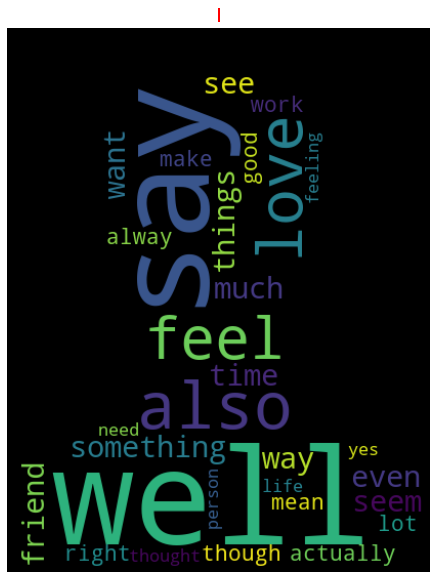

In [10]:
img = Image.open(r'.\Sun.jpg') # 배경 모양 커스터마이징
picture = np.array(img)
custom_words = [x.lower() for x in list(df.type.unique())]
custom_words.extend(['think', 'like', 'people', 'know', 'one', 'thing', 'would', 'really', 'get', 'type'])
cloud = WordCloud(background_color='black', max_words=30, mask = picture, 
    stopwords = custom_words) # 의미없이 자주 등장하는 단어들 제외

for i in range(2):
    sentence = df_EI.posts.iloc[i]
    cloud.generate(sentence)
    
    plt.figure(figsize=(10,10))
    plt.title(df_EI.index[i], fontdict=  {'fontsize': 20,
        'fontweight': 10,
        'color': "red"})
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")  
    plt.show()